# COMP-2704: Final Project
# Decision Tree
## Author: Jerome Geronimo (#0397026)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils9

## Read the dataset into a Pandas dataframe

In [2]:
# Read the cleaned and resampled dataset to a dataframe
df = pd.read_csv('resampled_data.csv', index_col=0)
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M14860,M,-0.952389,-0.947360,0.068185,0.282200,-1.695984,No Failure
1,L47181,L,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,No Failure
2,L47182,L,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,No Failure
3,L47183,L,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,No Failure
4,L47184,L,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,No Failure
...,...,...,...,...,...,...,...,...
57907,M17801,M,0.347507,-0.273351,2.550403,-2.025083,1.493285,Tool Wear Failure
57908,L56354,L,-1.102378,-0.745157,1.853151,-1.443247,1.446152,Tool Wear Failure
57909,M22971,M,0.197519,1.209468,0.079341,-0.690872,1.587549,Tool Wear Failure
57910,L53436,L,0.497496,0.400658,-0.255340,-0.219383,1.540417,Tool Wear Failure


## Removing unnecessary feature/s

Product ID is unique for all entries and does not really tell us anything about the product conditions. This information will only confuse our model and cause it to overfit by memorizing the Product IDs.

In [3]:
# Drop the Product ID column
df.drop(['Product ID'], axis=1, inplace=True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,-0.952389,-0.947360,0.068185,0.282200,-1.695984,No Failure
1,L,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,No Failure
2,L,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,No Failure
3,L,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,No Failure
4,L,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,No Failure
...,...,...,...,...,...,...,...
57907,M,0.347507,-0.273351,2.550403,-2.025083,1.493285,Tool Wear Failure
57908,L,-1.102378,-0.745157,1.853151,-1.443247,1.446152,Tool Wear Failure
57909,M,0.197519,1.209468,0.079341,-0.690872,1.587549,Tool Wear Failure
57910,L,0.497496,0.400658,-0.255340,-0.219383,1.540417,Tool Wear Failure


## Some more data cleaning
Since SVM classifiers cannot handle categorical features, I need to one-hot encode the Type column.

Using Pandas get_dummies function, I've added new Type columns to indicate whether the part is of Low, Medium or High quality.

In [4]:
# Convert categorical variable into indicator variables
type_columns = pd.get_dummies(df['Type'], prefix='Type', dtype=int)
# Create a new dataframe, appending the new type columns
df_one_hot = pd.concat([df, type_columns], axis=1)
# Drop the type column
df_one_hot = df_one_hot.drop('Type', axis=1)
# df_one_hot = df
df_one_hot

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,No Failure,0,0,1
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,No Failure,0,1,0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,No Failure,0,1,0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,No Failure,0,1,0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,No Failure,0,1,0
...,...,...,...,...,...,...,...,...,...
57907,0.347507,-0.273351,2.550403,-2.025083,1.493285,Tool Wear Failure,0,0,1
57908,-1.102378,-0.745157,1.853151,-1.443247,1.446152,Tool Wear Failure,0,1,0
57909,0.197519,1.209468,0.079341,-0.690872,1.587549,Tool Wear Failure,0,0,1
57910,0.497496,0.400658,-0.255340,-0.219383,1.540417,Tool Wear Failure,0,1,0


## Preparing the training data

For model training using scikit-learn, I have to separate the labels from the features.

The code below separates the features from the labels using Pandas.

In [5]:
X = df_one_hot.drop('Failure Type', axis=1)
y = df_one_hot['Failure Type']
display(X.head(), y.head())

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,1
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,1,0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,1,0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,1,0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,1,0


0    No Failure
1    No Failure
2    No Failure
3    No Failure
4    No Failure
Name: Failure Type, dtype: object

## Split the data into training, validation, and testing sets

Since we have 57912 rows in our dataset, it is large enough for an 80-10-10 split.
Training our model using 46,000 data points seems reasonable and shouldn't cause any overfit or underfit.

In [6]:
from sklearn.model_selection import train_test_split

# Allocate 10 percent of my data points to my test dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Allocate another 10 percent of my data to my validation dataset
# The rest of my data (80%) will be my training dataset
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

print(f'There are {len(X_train)} training data points.')
print(f'There are {len(X_val)} validation data points.')
print(f'There are {len(X_test)} testing data points.')

There are 46328 training data points.
There are 5792 validation data points.
There are 5792 testing data points.


## Training our SVM classifiers

For this first model, we want to try training different SVM classifiers and look at their accuracies.

#### Training a Linear SVM

In [7]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
print("Training Accuracy:", svm_linear.score(X_train, y_train))
print("Validation Accuracy:", svm_linear.score(X_val, y_val))

Training Accuracy: 0.875
Validation Accuracy: 0.8743093922651933


In [8]:
# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01, random_state=42)
svm_c_001.fit(X_train, y_train)
print("C = 0.01")
print("Training Accuracy:", svm_c_001.score(X_train, y_train))
print("Validation Accuracy:", svm_c_001.score(X_val, y_val))

# C = 10
svm_c_10 = SVC(kernel='linear', C=10, random_state=42)
svm_c_10.fit(X_train, y_train)
print("C = 10")
print("Training Accuracy:", svm_c_10.score(X_train, y_train))
print("Validation Accuracy:", svm_c_10.score(X_val, y_val))

# C = 100
svm_c_100 = SVC(kernel='linear', C=100, random_state=42)
svm_c_100.fit(X_train, y_train)
print("C = 100")
print("Training Accuracy:", svm_c_100.score(X_train, y_train))
print("Validation Accuracy:", svm_c_100.score(X_val, y_val))

C = 0.01
Training Accuracy: 0.8394275600069073
Validation Accuracy: 0.8392610497237569
C = 10
Training Accuracy: 0.8790796062856157
Validation Accuracy: 0.8784530386740331
C = 100
Training Accuracy: 0.8891599032982214
Validation Accuracy: 0.8893301104972375


##### For our specific use case, we want a model with high classification 'accuracy' to ensure precise failure predictions.

##### Among the three linear SVMs above, svm_c_100 has the highest training and validation accuracies. Hence, we'll choose this model for further comparison below.

In [9]:
from sklearn.model_selection import cross_val_score
cv_score_c_10 = cross_val_score(svm_c_10, X_val, y_val, cv=5, scoring='precision_micro')
cv_score_c_100 = cross_val_score(svm_c_100, X_val, y_val, cv=5, scoring='precision_micro')
print(f'CV Score of svm_c_10 {cv_score_c_10}')
print(f'CV Score of svm_c_100 {cv_score_c_100}')

CV Score of svm_c_10 [0.86626402 0.85849871 0.87996546 0.86528497 0.88341969]
CV Score of svm_c_100 [0.88093184 0.87489215 0.88341969 0.87046632 0.88946459]


#### Training a Poly Kernel SVM

In [10]:
# degree = 3
svm_degree_3 = SVC(kernel='poly', degree=3, random_state=42)
svm_degree_3.fit(X_train, y_train)
print("Degree = 3")
print("Training Accuracy:", svm_degree_3.score(X_train, y_train))
print("Validation Accuracy:", svm_degree_3.score(X_val, y_val))

# degree = 5, OVO
svm_degree_5_ovo = SVC(kernel='poly', degree=5, decision_function_shape='ovo', random_state=42)
svm_degree_5_ovo.fit(X_train, y_train)
print("Degree = 5, OVO")
print("Training Accuracy:", svm_degree_5_ovo.score(X_train, y_train))
print("Validation Accuracy:", svm_degree_5_ovo.score(X_val, y_val))

# degree = 5, OVR
svm_degree_5_ovr = SVC(kernel='poly', degree=5, decision_function_shape='ovo', random_state=42)
svm_degree_5_ovr.fit(X_train, y_train)
print("Degree = 5, OVR")
print("Training Accuracy:", svm_degree_5_ovr.score(X_train, y_train))
print("Validation Accuracy:", svm_degree_5_ovr.score(X_val, y_val))

# degree = 8
svm_degree_8 = SVC(kernel='poly', degree=8, random_state=42)
svm_degree_8.fit(X_train, y_train)
print("Degree = 8")
print("Training Accuracy:", svm_degree_8.score(X_train, y_train))
print("Validation Accuracy:", svm_degree_8.score(X_val, y_val))

Degree = 3
Training Accuracy: 0.9606933172163702
Validation Accuracy: 0.9590814917127072
Degree = 5, OVO
Training Accuracy: 0.9452598860300466
Validation Accuracy: 0.9449240331491713
Degree = 5, OVR
Training Accuracy: 0.9452598860300466
Validation Accuracy: 0.9449240331491713
Degree = 8
Training Accuracy: 0.8936496287342428
Validation Accuracy: 0.8908839779005525


##### Out of the 3 polynomial kernels above, svm_degree_5 has the best training and validation accuracies. We'll use this model in our comparison below.

#### Training an RBF Kernel SVM

In [11]:
# gamma = 0.1
svm_gamma_01 = SVC(kernel='rbf', gamma=0.1, random_state=42)
svm_gamma_01.fit(X_train, y_train)
print("Gamma = 0.1")
print("Training Accuracy:", svm_gamma_01.score(X_train, y_train))
print("Validation Accuracy:", svm_gamma_01.score(X_val, y_val))

# gamma = 1
svm_gamma_1 = SVC(kernel='rbf', gamma=1, random_state=42)
svm_gamma_1.fit(X_train, y_train)
print("Gamma = 1")
print("Training Accuracy:", svm_gamma_1.score(X_train, y_train))
print("Validation Accuracy:", svm_gamma_1.score(X_val, y_val))

# gamma = 10, OVO
svm_gamma_10_ovo = SVC(kernel='rbf', gamma=10, decision_function_shape='ovo', random_state=42)
svm_gamma_10_ovo.fit(X_train, y_train)
print("Gamma = 10, OVO")
print("Training Accuracy:", svm_gamma_10_ovo.score(X_train, y_train))
print("Validation Accuracy:", svm_gamma_10_ovo.score(X_val, y_val))

# gamma = 10, OVR
svm_gamma_10_ovr = SVC(kernel='rbf', gamma=10, decision_function_shape='ovr', random_state=42)
svm_gamma_10_ovr.fit(X_train, y_train)
print("Gamma = 10, OVR")
print("Training Accuracy:", svm_gamma_10_ovr.score(X_train, y_train))
print("Validation Accuracy:", svm_gamma_10_ovr.score(X_val, y_val))

# gamma = 100
svm_gamma_100 = SVC(kernel='rbf', gamma=100, random_state=42)
svm_gamma_100.fit(X_train, y_train)
print("Gamma = 100")
print("Training Accuracy:", svm_gamma_100.score(X_train, y_train))
print("Validation Accuracy:", svm_gamma_100.score(X_val, y_val))

Gamma = 0.1
Training Accuracy: 0.9735149369711622
Validation Accuracy: 0.9720303867403315
Gamma = 1
Training Accuracy: 0.9950569849766879
Validation Accuracy: 0.9936118784530387
Gamma = 10, OVO
Training Accuracy: 0.9999784147815576
Validation Accuracy: 0.9994820441988951
Gamma = 10, OVR
Training Accuracy: 0.9999784147815576
Validation Accuracy: 0.9994820441988951
Gamma = 100
Training Accuracy: 1.0
Validation Accuracy: 1.0


##### Out of the 4 RBF kernels above, svm_gamma_10 seems to be a good choice, having decent values for training and validation accuracies, which are not too high. We'll use this model in our comparison below.

## Using Grid-search

One way to pick the best combination of hyperparameters is to run an exhaustive search and choose the one that performs best in our validation set.
A Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

Let's try performing a grid-search using the following choices for our hyperparameters.

In [12]:
params = {'kernel': ['rbf', 'poly', 'linear'],
          'gamma': [0.001, 1, 100],
          'C': [ 0.1, 1 , 10],
          'degree': [3, 5, 8],
          'decision_function_shape': ['ovo', 'ovr']
        }

In [13]:
from sklearn.model_selection import GridSearchCV

svm_gs = GridSearchCV(estimator = SVC(),
                      param_grid = params)
# svm_gs.fit(X_train, y_train)

# svm_gscv = svm_gs.best_estimator_
# svm_gscv

# print("Training Accuracy:", svm_gscv.score(X_train, y_train))
# print("Validation Accuracy:", svm_gscv.score(X_val, y_val))

## Compare metrics

Using Scikit-learn's classification_report and confusion_matrix functions, let's select the best decision tree classifier for this dataset.

### Using classification reports

In [14]:
from sklearn.metrics import classification_report

#### Using the Linear SVM with C = 100

The linear SVM with C = 100 performed pretty well on both training and validation sets. 

##### Training Dataset

In [15]:
svm_c_100_pred = svm_c_100.predict(X_train)
cr = classification_report(y_train, svm_c_100_pred, labels=svm_c_100.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.97      1.00      0.99      7783
              No Failure       0.70      0.67      0.68      7702
      Overstrain Failure       0.98      1.00      0.99      7682
           Power Failure       0.99      0.99      0.99      7700
         Random Failures       0.75      0.72      0.73      7706
       Tool Wear Failure       0.93      0.96      0.94      7755

                accuracy                           0.89     46328
               macro avg       0.89      0.89      0.89     46328
            weighted avg       0.89      0.89      0.89     46328



##### Validation Dataset

In [16]:
svm_c_100_pred = svm_c_100.predict(X_val)
cr = classification_report(y_val, svm_c_100_pred, labels=svm_c_100.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.98      1.00      0.99       936
              No Failure       0.70      0.68      0.69       978
      Overstrain Failure       0.98      1.00      0.99       989
           Power Failure       0.99      0.99      0.99       981
         Random Failures       0.75      0.72      0.73       991
       Tool Wear Failure       0.93      0.96      0.94       917

                accuracy                           0.89      5792
               macro avg       0.89      0.89      0.89      5792
            weighted avg       0.89      0.89      0.89      5792



#### Using Poly kernel SVM with degree = 5, OVO

##### Training Dataset

In [17]:
svm_degree_5_ovo_pred = svm_degree_5_ovo.predict(X_train)
cr = classification_report(y_train, svm_degree_5_ovo_pred, labels=svm_degree_5_ovo.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.98      1.00      0.99      7783
              No Failure       0.80      0.90      0.84      7702
      Overstrain Failure       1.00      1.00      1.00      7682
           Power Failure       1.00      1.00      1.00      7700
         Random Failures       0.96      0.78      0.86      7706
       Tool Wear Failure       0.96      1.00      0.98      7755

                accuracy                           0.95     46328
               macro avg       0.95      0.95      0.94     46328
            weighted avg       0.95      0.95      0.94     46328



##### Validation Dataset

In [18]:
svm_degree_5_ovo_pred = svm_degree_5_ovo.predict(X_val)
cr = classification_report(y_val, svm_degree_5_ovo_pred, labels=svm_degree_5_ovo.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.98      1.00      0.99       936
              No Failure       0.80      0.89      0.85       978
      Overstrain Failure       1.00      1.00      1.00       989
           Power Failure       0.99      1.00      1.00       981
         Random Failures       0.96      0.79      0.86       991
       Tool Wear Failure       0.95      1.00      0.98       917

                accuracy                           0.94      5792
               macro avg       0.95      0.95      0.95      5792
            weighted avg       0.95      0.94      0.94      5792



#### Using Poly kernel SVM with degree = 5, OVR

##### Training Dataset

In [19]:
svm_degree_5_ovr_pred = svm_degree_5_ovr.predict(X_train)
cr = classification_report(y_train, svm_degree_5_ovr_pred, labels=svm_degree_5_ovr.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.98      1.00      0.99      7783
              No Failure       0.80      0.90      0.84      7702
      Overstrain Failure       1.00      1.00      1.00      7682
           Power Failure       1.00      1.00      1.00      7700
         Random Failures       0.96      0.78      0.86      7706
       Tool Wear Failure       0.96      1.00      0.98      7755

                accuracy                           0.95     46328
               macro avg       0.95      0.95      0.94     46328
            weighted avg       0.95      0.95      0.94     46328



##### Validation Dataset

In [20]:
svm_degree_5_ovr_pred = svm_degree_5_ovr.predict(X_val)
cr = classification_report(y_val, svm_degree_5_ovr_pred, labels=svm_degree_5_ovr.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.98      1.00      0.99       936
              No Failure       0.80      0.89      0.85       978
      Overstrain Failure       1.00      1.00      1.00       989
           Power Failure       0.99      1.00      1.00       981
         Random Failures       0.96      0.79      0.86       991
       Tool Wear Failure       0.95      1.00      0.98       917

                accuracy                           0.94      5792
               macro avg       0.95      0.95      0.95      5792
            weighted avg       0.95      0.94      0.94      5792



#### Using RBF kernel SVM with Gamma = 10, OVO

##### Training Dataset

In [21]:
svm_gamma_10_ovo_pred = svm_gamma_10_ovo.predict(X_train)
cr = classification_report(y_train, svm_gamma_10_ovo_pred, labels=svm_gamma_10_ovo.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      7783
              No Failure       1.00      1.00      1.00      7702
      Overstrain Failure       1.00      1.00      1.00      7682
           Power Failure       1.00      1.00      1.00      7700
         Random Failures       1.00      1.00      1.00      7706
       Tool Wear Failure       1.00      1.00      1.00      7755

                accuracy                           1.00     46328
               macro avg       1.00      1.00      1.00     46328
            weighted avg       1.00      1.00      1.00     46328



##### Validation Dataset

In [22]:
svm_gamma_10_ovo_pred = svm_gamma_10_ovo.predict(X_val)
cr = classification_report(y_val, svm_gamma_10_ovo_pred, labels=svm_gamma_10_ovo.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00       936
              No Failure       1.00      1.00      1.00       978
      Overstrain Failure       1.00      1.00      1.00       989
           Power Failure       1.00      1.00      1.00       981
         Random Failures       1.00      1.00      1.00       991
       Tool Wear Failure       1.00      1.00      1.00       917

                accuracy                           1.00      5792
               macro avg       1.00      1.00      1.00      5792
            weighted avg       1.00      1.00      1.00      5792



#### Using RBF kernel SVM with Gamma = 10, OVR

##### Training Dataset

In [23]:
svm_gamma_10_ovr_pred = svm_gamma_10_ovr.predict(X_train)
cr = classification_report(y_train, svm_gamma_10_ovr_pred, labels=svm_gamma_10_ovr.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      7783
              No Failure       1.00      1.00      1.00      7702
      Overstrain Failure       1.00      1.00      1.00      7682
           Power Failure       1.00      1.00      1.00      7700
         Random Failures       1.00      1.00      1.00      7706
       Tool Wear Failure       1.00      1.00      1.00      7755

                accuracy                           1.00     46328
               macro avg       1.00      1.00      1.00     46328
            weighted avg       1.00      1.00      1.00     46328



##### Validation Dataset

In [24]:
svm_gamma_10_ovr_pred = svm_gamma_10_ovr.predict(X_val)
cr = classification_report(y_val, svm_gamma_10_ovr_pred, labels=svm_gamma_10_ovr.classes_)
print(cr)

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00       936
              No Failure       1.00      1.00      1.00       978
      Overstrain Failure       1.00      1.00      1.00       989
           Power Failure       1.00      1.00      1.00       981
         Random Failures       1.00      1.00      1.00       991
       Tool Wear Failure       1.00      1.00      1.00       917

                accuracy                           1.00      5792
               macro avg       1.00      1.00      1.00      5792
            weighted avg       1.00      1.00      1.00      5792



### Using confusion matrices

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
svm_c_100_pred_train = svm_c_100.predict(X_train)
svm_c_100_pred_val = svm_c_100.predict(X_val)

svm_degree_5_ovo_pred_train = svm_degree_5_ovo.predict(X_train)
svm_degree_5_ovo_pred_val = svm_degree_5_ovo.predict(X_val)

svm_gamma_10_ovr_pred_train = svm_gamma_10_ovr.predict(X_train)
svm_gamma_10_ovr_pred_val = svm_gamma_10_ovr.predict(X_val)

Text(0.5, 1.0, 'SVM RBF Gamma = 10, OVR (Val)')

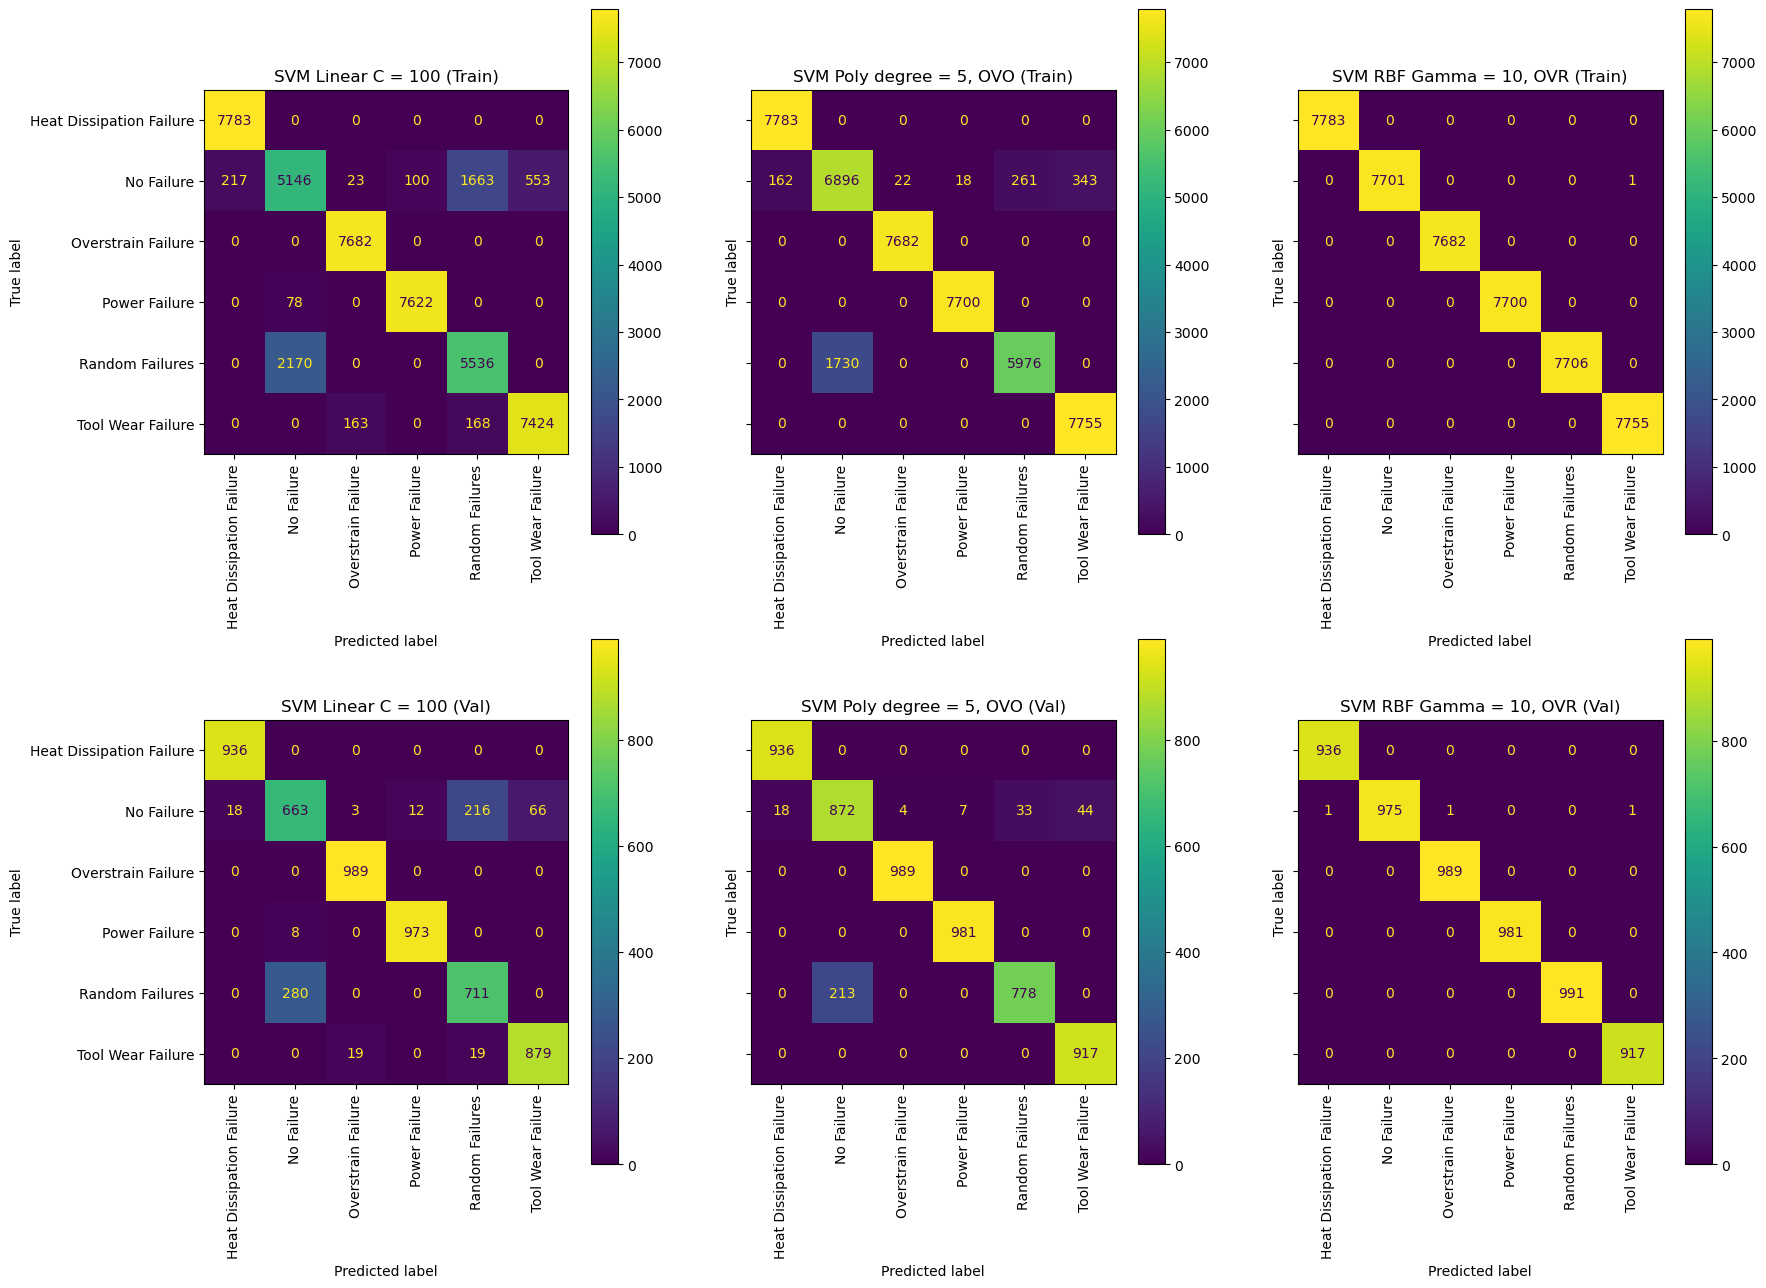

In [27]:
fig, ax = plt.subplots(2,3,figsize=(20,15),sharey='row')

# Using Linear SVM with C=100
ConfusionMatrixDisplay.from_predictions(y_train,
                                        svm_c_100_pred_train,
                                        labels=list(svm_c_100.classes_),
                                        xticks_rotation='vertical',
                                        ax=ax[0,0])

ConfusionMatrixDisplay.from_predictions(y_val,
                                        svm_c_100_pred_val,
                                        labels=list(svm_c_100.classes_),
                                        xticks_rotation='vertical',
                                        ax=ax[1,0])

# Using Poly kernel SVM with degree = 5, OVO
ConfusionMatrixDisplay.from_predictions(y_train,
                                        svm_degree_5_ovo_pred_train,
                                        labels=list(svm_degree_5_ovo.classes_),
                                        xticks_rotation='vertical',
                                        ax=ax[0,1])
ConfusionMatrixDisplay.from_predictions(y_val,
                                        svm_degree_5_ovo_pred_val,
                                        labels=list(svm_degree_5_ovo.classes_),
                                        xticks_rotation='vertical',
                                        ax=ax[1,1])

# Using RBF kernel SVM with Gamma = 10, OVR
ConfusionMatrixDisplay.from_predictions(y_train,
                                        svm_gamma_10_ovr_pred_train,
                                        labels=list(svm_gamma_10_ovr.classes_),
                                        xticks_rotation='vertical',
                                        ax=ax[0,2])
ConfusionMatrixDisplay.from_predictions(y_val,
                                        svm_gamma_10_ovr_pred_val,
                                        labels=list(svm_gamma_10_ovr.classes_),
                                        xticks_rotation='vertical',
                                        ax=ax[1,2])

ax[0,0].set_title('SVM Linear C = 100 (Train)')
ax[1,0].set_title('SVM Linear C = 100 (Val)')
ax[0,1].set_title('SVM Poly degree = 5, OVO (Train)')
ax[1,1].set_title('SVM Poly degree = 5, OVO (Val)')
ax[0,2].set_title('SVM RBF Gamma = 10, OVR (Train)')
ax[1,2].set_title('SVM RBF Gamma = 10, OVR (Val)')

## Observations and Model Selection

Since we want to minimize the false positives of the 'No Failure' class, we are looking for a model with high precision. Among the three models compared, the Linear SVM has the lowest precision for the class, making it the worst choice.

The Poly kernel SVM and the RBF kernel SVM have training accuracies of 94.49% and 99.95% respectively. However, again, accuracy alone isn't a reliable indicator of model performance for our use case. We need a model with higher precision for the 'No Failure' class.

The classification report above shows that the RBF kernel SVM has 100% for all of the metrics. This is also illustrated by the confusion matrix above (lower right). While this seems like a good model, it might be overfit for the training data.

The Poly kernel SVM, on the other hand, has a high average precision of 95%, based on the classification report. Although it only has 80% precision for the 'No Failure' class, based on its confusion matrix, it misclassified only 213 points as 'No Failure', which is only 3.68% of the dataset. Moreover, These misclassified points are Random Failures which are by-chance failures and aren't really related to product parameters.

Considering these observations, we conclude that the Poly kernel SVM (with degree = 5) is the most suitable SVM classifier for our dataset and use case.